# Progetto Orienteering


## Definizione
##### Dati n nodi nel piano euclideo, ognuno con un punteggio noto 



\begin{eqnarray} 
&s_i \ge 0 & \quad \quad \quad \\ 
\end{eqnarray}

\begin{eqnarray} 
&\forall i=1 ... n & \quad \quad \quad \\ 
\end{eqnarray}

Sia $V$ l'insieme dei pesi : $s_i \in V \quad \forall i=1...n$. \
Sia $A$ l'insieme delle distanze $d_{ij}$ 

##### Risolver il problema dell'orienteering significa trovare il percorso con massimo punteggio attraversando i nodi partendo da un control point e ritornandoci e non superando una data durata $TMax$.

##### Si noti che il control point deve avere punteggio nullo, ovvero con $s_1$ = 0.

In [37]:
from IPython.display import Image
  
# get the image
Image(url="grafo.png", width=500, height=550)

## Variabili Decisionali

$x_{ij} = 1$ se l'arco $(i,j) \in A$ appartiene al percorso seguito dal concorrente.
$x_{ij} = 0$ altrimenti. \
$y_i = 1$ se il nodo $i \in V$ è visitato. \
$y_i = 0$ altrimenti. 

## Funzione Obiettivo

\begin{equation} 
\text{Max} \sum_{i \in V} s_i \cdot y_i
\end{equation}

## Vincoli

$\cdot$ Il nodo origine deve avere un arco uscente e uno entrante.

\begin{equation} 
\sum_{j:(1,j) \in A} x_{1j} = \sum_{i:(i,1) \in A} x_{i1} = 1
\end{equation}

$\cdot$ Per ogni altro nodo, se viene selezionato un arco entrante, deve essere selezionato anche un arco uscente.

\begin{equation} 
\sum_{j:(i,j) \in A} x_{ij} = \sum_{i:(j,i) \in A} x_{ji} \quad \quad j \in V
\end{equation}

$\cdot$ Il j-esimo nodo è visitato se ha un arco entrante.

\begin{equation} 
\sum_{i:(j,i) \in A} x_{ji}=y_j \quad \quad j \in V
\end{equation}

$\cdot$ Il circuito percorso non può avere durata maggiore di $TMax$.

\begin{equation} 
\sum_{(j,i) \in A} d_{ij} \cdot x_{ij} \le \text{TMax}
\end{equation}

### Vincoli di assenza di Sottogiro

In una soluzione ammissibile non ci possono essere cicli su un sottoinsime proprio dell'insieme dei nodi $V$.

Si definisce un nuovo insieme di varibili 
\begin{eqnarray}
&u_i \quad i \in V   
\end{eqnarray}
Tale variabile binaria indica l'ordine di visita del vertice $i$.

$\cdot$ Vincoli che definiscono l'ordine di visita di un nodo in funzione delle varibili $x_{ij}$

\begin{eqnarray} 
&u_1 = 0 & \quad \quad \quad \ &u_j - u_i \ge 1 - n(1-x_{ij}) & \quad \quad  (i,j) \in V, \ i\neq j, \ j \neq 1 
\end{eqnarray}

\begin{equation} 
0 \le u_i \le n-1 \quad intera \quad i \in V
\end{equation}

## Istanza

Individuare il circuito che consente di accumulare il maggior punteggio, rispettando il $TMax$ assegnato.

##### Viene fornito un file con le coordinate cartesiane dei vari control point.
##### I punteggi dei vari control point vengono vengono generati random.
###### (per confronto con script py che utilizza gli algoritmi genetici si decide di dare in ingresso anche il vettore dei pesi).

## Codice Gurobi
#### Si utizza numpy per importare il file contenente le coordinate cartesiane dei control point, importate al fine di trovare le distanze fra quest'ultimi.

In [38]:
import numpy as np
 
coordinate = []
dist = {}
 
fileName = "att48"
file = open(fileName + ".tsp", "r")
 
line = file.readline()
while not line.startswith("EOF"):
 
    if line.startswith("NAME: "):
        print("Name Processed")
        name = line.replace("NAME: ", "")
        line = file.readline()
 
    elif line.startswith("DIMENSION: "):
        print("Dimension Processed")
        NumNodes = int(line.replace("DIMENSION: ", ""))
        line = file.readline()
 
    elif line.startswith("NODE_COORD_SECTION"):
        print("Node Coord Section Processed")
        line = file.readline()     
        for i in range(0, int(NumNodes)):
            split_line = line.split(" ")
            coordinate.append((float(split_line[1]), float(split_line[2])))
            line = file.readline()
 
    else: line = file.readline()

print("Cordinate:\n",coordinate)

Name Processed
Dimension Processed
Node Coord Section Processed
Cordinate:
 [(6734.0, 1453.0), (2233.0, 10.0), (5530.0, 1424.0), (401.0, 841.0), (3082.0, 1644.0), (7608.0, 4458.0), (7573.0, 3716.0), (7265.0, 1268.0), (6898.0, 1885.0), (1112.0, 2049.0), (5468.0, 2606.0), (5989.0, 2873.0), (4706.0, 2674.0), (4612.0, 2035.0), (6347.0, 2683.0), (6107.0, 669.0), (7611.0, 5184.0), (7462.0, 3590.0), (7732.0, 4723.0), (5900.0, 3561.0), (4483.0, 3369.0), (6101.0, 1110.0), (5199.0, 2182.0), (1633.0, 2809.0), (4307.0, 2322.0), (675.0, 1006.0), (7555.0, 4819.0), (7541.0, 3981.0), (3177.0, 756.0), (7352.0, 4506.0), (7545.0, 2801.0), (3245.0, 3305.0), (6426.0, 3173.0), (4608.0, 1198.0), (23.0, 2216.0), (7248.0, 3779.0), (7762.0, 4595.0), (7392.0, 2244.0), (3484.0, 2829.0), (6271.0, 2135.0), (4985.0, 140.0), (1916.0, 1569.0), (7280.0, 4899.0), (7509.0, 3239.0), (10.0, 2676.0), (6807.0, 2993.0), (5185.0, 3258.0), (3023.0, 1942.0)]


#### Genero lo score dei control points random (setto il peso del cp iniziale a 0).

In [39]:
import random 
score=[]
score.append(0)
for i in range(int(NumNodes)-1):
    score.append(random.randint(1,15))
print('Score:',score)

Score: [0, 9, 11, 4, 7, 1, 8, 6, 12, 10, 12, 1, 13, 15, 6, 8, 6, 5, 5, 14, 8, 7, 5, 9, 11, 13, 6, 4, 7, 1, 4, 4, 14, 6, 13, 14, 3, 8, 9, 15, 2, 14, 3, 7, 7, 9, 10, 1]


#### Definisco la funzione che verrà utilizzata per calcolare le distanze tra i vari control points

In [40]:
import math
 
def distance(i, j):
    c1 = coordinate[i]
    c2 = coordinate[j]
    diff = (c1[0]-c2[0], c1[1]-c2[1])
    return math.sqrt(diff[0]*diff[0]+diff[1]*diff[1])
 
dist = {(i, j): distance(i,j) for i in range(int(NumNodes)) for j in range(int(NumNodes)) if i != j }
Tmax=30000

#### Inizializzo il modello utilizzando GRB e definisco le variabili di controllo 

In [41]:
import gurobipy as gp
from gurobipy import GRB
#import numpy as np

#Inizzializzazione modello

mod = gp.Model('orienteering')

Xvars = mod.addVars(dist.keys(), vtype=GRB.BINARY, name='x')
Yvars=mod.addVars(len(score),obj=score,vtype=GRB.BINARY,name='y') #si nun funzion e colp e chist
Uvars = mod.addVars(NumNodes,vtype=GRB.INTEGER, name='u')
#print(Yvars)

obj=gp.quicksum((Yvars[i]*score[i]) for i in range(0,int(NumNodes)))
mod.setObjective(obj,GRB.MAXIMIZE)


#### Vincoli di assegnamento

In [42]:
#oringin=mod.addConstr(Xvars.sum('*',0)==1)
#origin_1=mod.addConstr(Xvars.sum(0,'*')==1)
#others=mod.addConstrs(Xvars.sum('*',i)==Xvars.sum(i,'*') for i in range(int(NumNodes)))
#timeMax = mod. addConstr ((gp.quicksum (Xvars[i, j]*distance (i, j) for j in range(int(NumNodes)) for i in range(int(NumNodes)) if i!=j)) <= Tmax)
#nodes=mod.addConstrs(Xvars.sum('*',i)==Yvars[i] for i in range(int(NumNodes)))
#mod.write("OP.lp")



In [43]:
star = mod.addConstrs((Xvars.sum(i,"*")==Xvars.sum("*",i) for i in range(int(NumNodes))))
oringin=mod.addConstr(Xvars.sum('*',0)==1)
origin_1=mod.addConstr(Xvars.sum(0,'*')==1)
visited = mod.addConstrs((Xvars. sum("*", i) == Yvars[i] for i in range(int(NumNodes))))
timeMax = mod.addConstr((gp.quicksum(Xvars[i,j]*distance(i,j) for j in range(int(NumNodes)) for i in range(int(NumNodes)) if i!=j)) <= Tmax)

#### Variabili di posizione

In [44]:
PositionIni = mod.addConstr(Uvars[0] == 1) #posizione iniziale
Position = mod.addConstrs(Uvars[j]-Uvars[i]-int(NumNodes)*Xvars[i,j]>=1-int(NumNodes)
                          for i in range(int(NumNodes)) for j in range(int(NumNodes)) if i != j and j != 0)
mod.write("OP1.lp")

In [45]:
mod.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2309 rows, 2352 columns and 15794 nonzeros
Model fingerprint: 0xbe8f6d25
Variable types: 0 continuous, 2352 integer (2304 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+03]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+04]
Found heuristic solution: objective 7.0000000
Presolve removed 3 rows and 2 columns
Presolve time: 0.06s
Presolved: 2306 rows, 2350 columns, 13405 nonzeros
Variable types: 0 continuous, 2350 integer (2303 binary)

Root relaxation: objective 3.670000e+02, 704 iterations, 0.03 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  367.00000    0   49    7.00000  367.00000  5143%     -    0s
H    0     0      

In [46]:
 mod.write("out.sol")

In [47]:
Xvals = mod.getAttr('x', Xvars)
Uvals = mod.getAttr('x', Uvars)
notfinish=1
#print(Xvars[0,1].X)
optTour=[]
#print(Xvals)
i=0
j=1
optTour.append(0)
while notfinish:
    while j != 0:
        if(i!=j):
            if ((Xvars[i,j].X) == 1.0):
                optTour.append(j)
                i=j
                j=1
        if j<47:
            j=j+1
        else:
            j=0
        if j==0:
            notfinish=0
optTour.append(0)
print(optTour)

[0, 8, 37, 30, 43, 17, 6, 27, 5, 36, 18, 26, 16, 42, 29, 35, 45, 32, 19, 46, 20, 38, 31, 23, 9, 44, 34, 3, 25, 41, 47, 4, 28, 33, 13, 24, 12, 22, 10, 11, 14, 39, 2, 21, 15, 0]


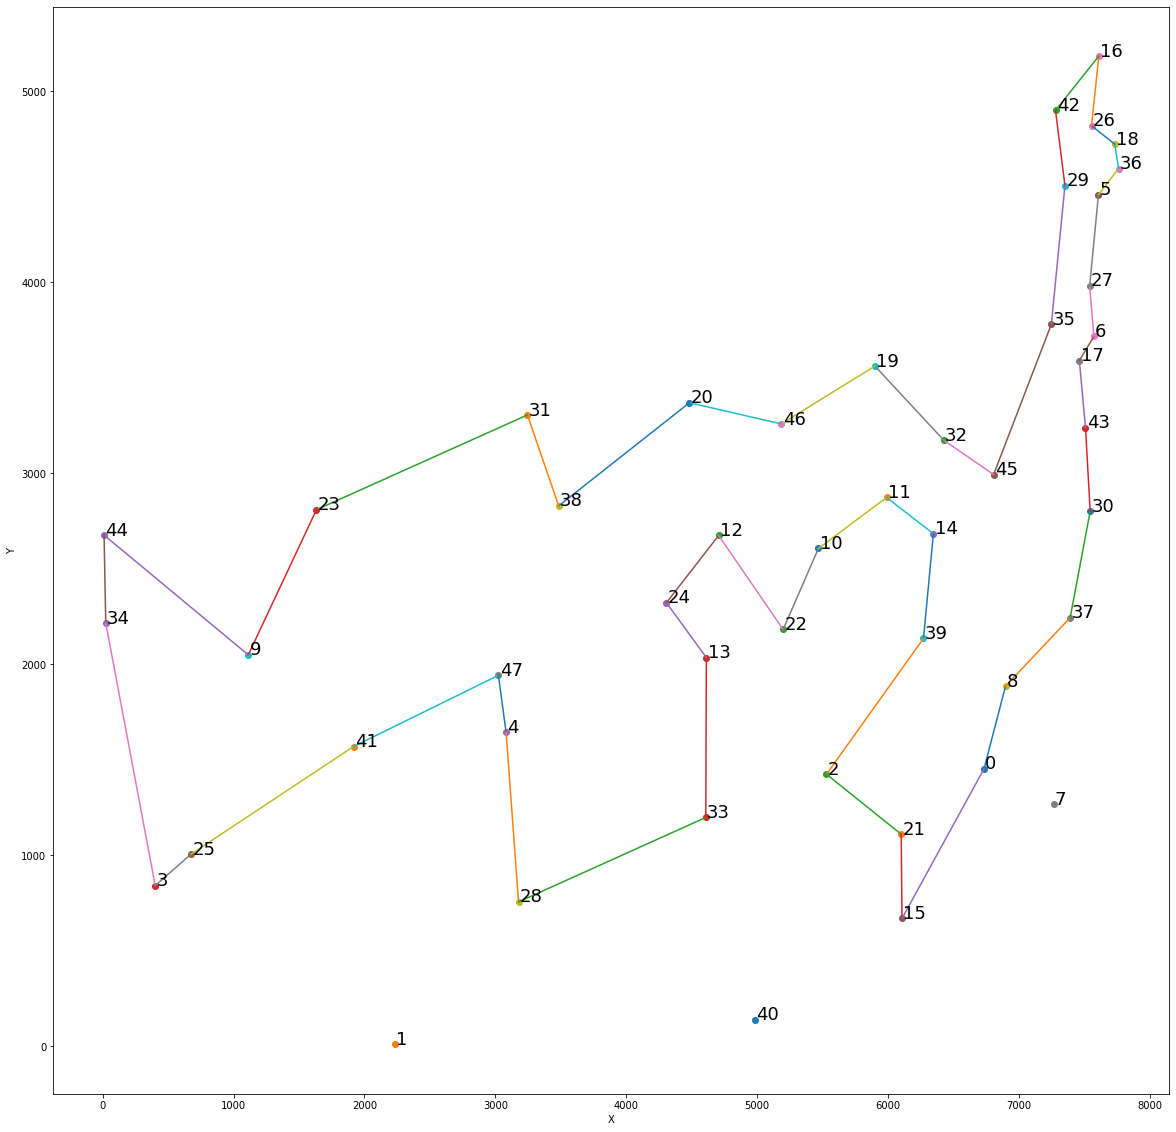

In [48]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(0,int(NumNodes)):
    if i==0:
        plt.scatter(coordinate[i][0],coordinate[i][1])
        plt.text(coordinate[i][0]+10,coordinate[i][1], str(i), fontsize=18)

    else:
        plt.scatter(coordinate[i][0],coordinate[i][1],)
        plt.text(coordinate[i][0]+10,coordinate[i][1], str(i),fontsize=18)

            
for i in range(0,len(optTour)-1):
    plt.plot([coordinate[optTour[i]][0],coordinate[optTour[i+1]][0]], [coordinate[optTour[i]][1],coordinate[optTour[i+1]][1]])  
            
plt.plot([coordinate[optTour[len(optTour)-1]][0],coordinate[optTour[0]][0]], [coordinate[optTour[len(optTour)-1]][1],coordinate[optTour[0]][1]])
        
plt.xlabel('X');
plt.ylabel('Y');